# <center> Hypothesis Testing </center>

###### Explained in many words, with best of my abilities. At the end, all the web pages used will be added in reference cell

###  <center> Step by Step Approach to work using Hypothesis Testing </center>

1. What is Hypothesis?

    Hypothesis is an assumption where a reasoning is reached without all facts to support the reason or decision. In some cases, Hypothesis has lead to ground breaking research.
   
   
2. What is Hypothesis Testing?

    Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use.


3. What is Null Hypothesis?

    You are given an Hypothesis, based on further evaluation, you will observe that the hypothesis you have received to be a fact. This is known as <i> <b> Null Hypothesis </b> </i>, i.e, you are accepting the Hypothesis, if you are to challenge the presumed hypothesis, it will be known as <i> <b> Alternate Hypothesis </b> </i>.

## Understanding 

### STEP - 1:

* (ini) Null Hypothesis(Status Quo): $ H_0   \Rightarrow  \ \leq, \ \geq, \ = $
* Alternate Hypothesis(Bold Claim) : $ H_1   \Rightarrow  \ <, \ > , \ \neq $

### STEP - 2:

* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

### STEP - 3:

    Compte Test Statistics

* If population variance is known
$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}} $$

* If population varaince is unknown
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


### STEP - 4:

* Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

### STEP - 5:

#### STEP - 5.1:

Apply Decision Rule
    
* If test statistic is z-score ,

    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score,

    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
    
#### STEP - 5.2: 

Compute p-value $ P(Test \ Statistics | H_0) $

* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
* Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [1]:
# Import relevant Libraries

import matplotlib.pyplot as plt
import numpy as np

from math import sqrt
from scipy.stats import t, norm

In [2]:
def t_score(sample_size,sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size ** 0.5
    return numerator / denomenator

In [3]:
# One tail assuming 95% confidence interval

alpha = 1 - 0.95

t_critical_1 = t.ppf(1-alpha, df = 19)

print(t_critical_1)

1.729132811521367


In [4]:
# Two tail assuming 95% confidence interval

alpha = 1 - 0.95

t_critical_2 = t.ppf(1-alpha/2, df = 19)

print(t_critical_2)

2.093024054408263


# Problem Statement_1

Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~~ {Given that the population std is 50} ~~.

Step - 1: 

* Alternate Hypothesis (Bold claim):$$ H_1: \ Packets \ does \ not \ contain \ 500 \ grams $$
* Null Hypothesis (Status Quo):$$ H_0: \ Packets \ does  \ contain \ 500 \ grams $$

Step - 2:

* Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean$$ \bar{x} \ = \ 465.30 $$


Step - 3:

* Compute Test Statistic:
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


Step - 4: 

* Decide $ \alpha $ or significance level 

With 95% confidence interval, $ \alpha $ = 1 - 0.95 = 0.05

Step - 5: 

* Step - 5.1: 
    * 2 tailed t-test : Failed to reject $ H_0 $

* Step - 5.2: 
    * p-value = 0.2064

In [5]:
# observations
samples = [490,220,470,500,495,496,496,498,508,480]

In [6]:
#sample mean and sample-size

sample_mean = sum(samples) / len(samples)
sample_size = len(samples)

In [7]:
# calculate the sample_std 
score = 0
for i in samples:
    score += ((i - sample_mean) ** 2)/(sample_size - 1)
    sample_std = sqrt(score)

In [8]:
print("Sample Standard Deviation",round(sample_std,3))
print("Sample Mean", sample_mean)

Sample Standard Deviation 86.849
Sample Mean 465.3


In [9]:
# define population mean

pop_mean = 500

#Print t_score
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print("t_score is: ", t)

t_score is:  -1.263475128444671


Text(465.3, 0.0007, 'x_bar')

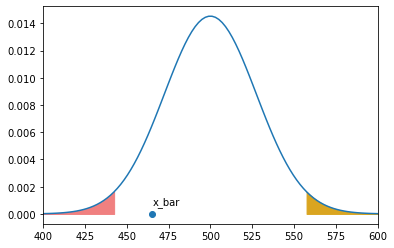

In [10]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical_2 * std)
t_critical_right = pop_mean + (t_critical_2 * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='lightcoral')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='goldenrod')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In this case, sample mean falls outside the rejection region, so we have failed to reject null hypothesis

In [11]:
# Conclusion using t test

if(np.abs(t) > t_critical_2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [12]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", round(p_value, 4))

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2064
Fail to reject Null Hypothesis


# Problem Statement_2

You have developed a new Natural Language Processing Algorithms and done a user study.
You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. 
How do you prove this to your client? ~~(Given that the population std is 0.5)~~


Step - 1: 

* Alternate Hypothesis (Bold claim):$$ H_1: \ user \ rating \ below \ 4 $$
* Null Hypothesis (Status Quo):$$ H_0: \ user \ rating  \ above \ 4 $$

Step - 2:

* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean$$ \bar{x} \ = \ 4.25 $$


Step - 3:

* Compute Test Statistic:
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


Step - 4: 

* Decide $ \alpha $ or significance level 

With 95% confidence interval, $ \alpha $ = 1 - 0.95 = 0.05

Step - 5: 

* Step - 5.1: 
    * Right tailed t-test : Failed to reject $ H_0 $

* Step - 5.2: 
    * p-value = 0.1888

In [13]:
# observations
samples = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [14]:
#sample mean and sample-size

sample_mean = sum(samples) / len(samples)
sample_size = len(samples)

In [15]:
# calculate the sample_std 
score = 0
for i in samples:
    score += ((i - sample_mean) ** 2)/(sample_size - 1)
    sample_std = sqrt(score)

In [16]:
print("Sample Standard Deviation",round(sample_std,3))
print("Sample Mean", sample_mean)

Sample Standard Deviation 0.851
Sample Mean 4.25


In [17]:
# define population mean

pop_mean = 4

#Print t_score
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print("t_score is: ", t)

t_score is:  1.314257481345542


Text(4.25, 0.1, 'x_bar')

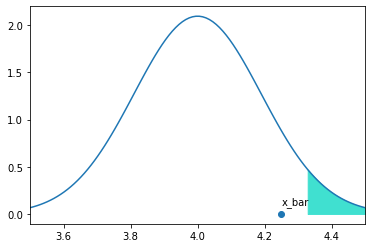

In [18]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical_1 * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='turquoise')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))


In this case, sample mean falls outside the rejection region, so we have failed to reject null hypothesis

In [19]:
# Conclusion using t test

if(np.abs(t) > t_critical_1):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [20]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", round(p_value, 4))

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.1888
Fail to reject Null Hypothesis


# Problem Statement_3

TATA has developed a better fuel management system for the SUV segment. 
They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 
~~(Given that the population std is 1)~~.


Step - 1: 

* Alternate Hypothesis (Bold claim):$$ H_1: \ mileage \ below \ 15KMPL $$
* Null Hypothesis (Status Quo):$$ H_0: \ mileage \ atleast  \ 15KMPL $$

Step - 2:

* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean$$ \bar{x} \ = \ 15.09KMPL $$


Step - 3:

* Compute Test Statistic:
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


Step - 4: 

* Decide $ \alpha $ or significance level 

With 95% confidence interval, $ \alpha $ = 1 - 0.95 = 0.05

Step - 5: 

* Step - 5.1: 
    * Right tailed t-test : Failed to reject $ H_0 $

* Step - 5.2: 
    * p-value = 0.6659

In [21]:
# observations
samples = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

In [22]:
#sample mean and sample-size

sample_mean = sum(samples) / len(samples)
sample_size = len(samples)

In [23]:
# calculate the sample_std 
score = 0
for i in samples:
    score += ((i - sample_mean) ** 2)/(sample_size - 1)
    sample_std = sqrt(score)

In [24]:
print("Sample Standard Deviation",round(sample_std,3))
print("Sample Mean", sample_mean)

Sample Standard Deviation 1.025
Sample Mean 15.098999999999998


In [25]:
# define population mean

pop_mean = 15

#Print t_score
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print("t_score is: ", t)

t_score is:  0.4317882018907916


Text(15.098999999999998, 0.1, 'x_bar')

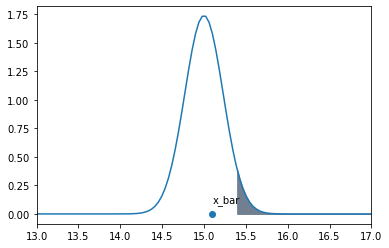

In [26]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical_1 * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='slategray')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))



In this case, sample mean falls outside the rejection region, so we have failed to reject null hypothesis

In [27]:
# Conclusion using t test

if(np.abs(t) > t_critical_1):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [28]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", round(p_value, 4))

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6659
Fail to reject Null Hypothesis


# Problem Statement_4

You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. 
How do you convince your client about this claim?~~(Based on past data you know that the std is 10 ms)~~.


Step - 1: 

* Alternate Hypothesis (Bold claim):$$ H_1: \ MLApps \ takes \ more \ than \ 100 \ ms $$
* Null Hypothesis (Status Quo):$$ H_0: \ MLApps \ less \ more \ than \ 100 \ ms $$

Step - 2:

* Collect a sample of size n = 10
* Compute sample mean$$ \bar{x} \ = \ 99.4 ms $$


Step - 3:

* Compute Test Statistic:
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


Step - 4: 

* Decide $ \alpha $ or significance level 

With 95% confidence interval, $ \alpha $ = 1 - 0.95 = 0.05

Step - 5: 

* Step - 5.1: 
    * Left tailed t-test : Failed to Reject $ H_0 $

* Step - 5.2: 
    * p-value = 0.7247

In [29]:
# observations
samples = [96, 95, 98, 100, 101, 102, 102, 105, 106, 95, 110, 85, 90, 99, 107]

In [30]:
#sample mean and sample-size

sample_mean = sum(samples) / len(samples)
sample_size = len(samples)
print(sample_size)

15


In [31]:
# calculate the sample_std 
score = 0
for i in samples:
    score += ((i - sample_mean) ** 2)/(sample_size - 1)
    sample_std = sqrt(score)

In [32]:
print("Sample Standard Deviation",round(sample_std,3))
print("Sample Mean", sample_mean)

Sample Standard Deviation 6.599
Sample Mean 99.4


In [33]:
# define population mean

pop_mean = 100

#Print t_score
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print("t_score is: ", t)

t_score is:  -0.35215869722540394


Text(99.4, 0.02, 'x_bar')

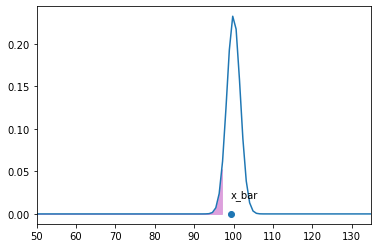

In [34]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 50
x_max = 135


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_left = pop_mean + (-t_critical_1 * std)


# Shading the right rejection region
x1 = np.linspace(x_min,t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='plum')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))


In [35]:
# Conclusion using t test

if(np.abs(t) > t_critical_1):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [36]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", round(p_value, 4))

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.7247
Fail to reject Null Hypothesis


## References

<a>     1. https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/#WhatisHT </a> <br>
<a>     2. https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/#whatis </a> <br>
<a>     3. https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd </a> <br>